In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc3 as pm

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [6]:
## 1 point

## ToDo: read the csv file into a dataframe and show the first 5 rows
import pandas as pd
import io
 
diab_df = pd.read_csv('diabetes.csv')
diab_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
## 3 points

## Assign the Outcome variable to y and the rest to X.
## USe LogisticRegression to fit the data and print out the intercept and the coefficients
X = diab_df.drop('Outcome', axis=1)
y = diab_df['Outcome']


from sklearn.model_selection import train_test_split
# Splitting into the training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

model = LogisticRegression()
model.fit(X_train,y_train)
print("Model Coefficient")
print(model.coef_)
print("Model Intercept:")
print(model.intercept_)


Model Coefficient
[[ 0.10143364  0.03358637 -0.01571116 -0.00134873 -0.00069746  0.08943674
   0.56048994  0.01705715]]
Model Intercept:
[-7.86826575]


In [8]:
## 2 points

## Explain what the code is doing:

## What are the prior probabilities of the intercept and coefficients?
# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sd=100)
    w1 = pm.Normal('w1', mu=0, sd=100)
    w2 = pm.Normal('w2', mu=0, sd=100)
    w3 = pm.Normal('w3', mu=0, sd=100)
    w4 = pm.Normal('w4', mu=0, sd=100)
    w5 = pm.Normal('w5', mu=0, sd=100)
    w6 = pm.Normal('w6', mu=0, sd=100)
    w7 = pm.Normal('w7', mu=0, sd=100)
    w8 = pm.Normal('w8', mu=0, sd=100)
   
    
    linreg = w0 * np.ones(diab_df.shape[0]) + w1 * diab_df.Pregnancies.values + w2 * diab_df.Glucose.values \
    + w3 * diab_df.BloodPressure.values + w4 * diab_df.SkinThickness.values + w5 * diab_df.Insulin.values + \
    w6 * diab_df.BMI.values + w7 * diab_df.DiabetesPedigreeFunction.values + w8 * diab_df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=diab_df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)


{'w0': array(-8.40408666), 'w1': array(0.12319458), 'w2': array(0.03516252), 'w3': array(-0.01328593), 'w4': array(0.0006153), 'w5': array(-0.00119126), 'w6': array(0.08968044), 'w7': array(0.94526838), 'w8': array(0.01485546)}


## Explain what the code is doing:

The code is implementing a logistic regression model with a Bayesian approach to predict the outcome of diabetes based on the given variables like Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age.


## What are the prior probabilities of the intercept and coefficients?

The prior probabilities for the intercept (w0) and coefficients (w1 to w8) are normal distributions with mean 0 and standard deviation 100.

## Which likelihood distribution has been used?
The likelihood distribution used is the Bernoulli distribution, which is appropriate for binary outcomes, such as the presence or absence of diabetes.


## What does pm.invlogit(linreg) mean?
pm.invlogit() transforms the linear regression equation, linreg, to a probability value between 0 and 1.

## What is map_est?
The map_est is the point estimate that maximizes the posterior distribution. The pm.find_MAP() function is used to find this estimate. It returns a dictionary of the estimated parameters and their values. In this case, the dictionary shows the estimated values for each of the coefficients (w0 to w8) in the logistic regression model.


/var/folders/g4/020x78v91s3643mdnds6k4hr0000gn/T/ipykernel_972/3614965849.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(400, step=pm.Metropolis())
Only 400 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [w8]
>Metropolis: [w7]
>Metropolis: [w6]
>Metropolis: [w5]
>Metropolis: [w4]
>Metropolis: [w3]
>Metropolis: [w2]
>Metropolis: [w1]
>Metropolis: [w0]
/Users/vishnusaju/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/vishnusaju/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is 

Sampling 4 chains for 1_000 tune and 400 draw iterations (4_000 + 1_600 draws total) took 16 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


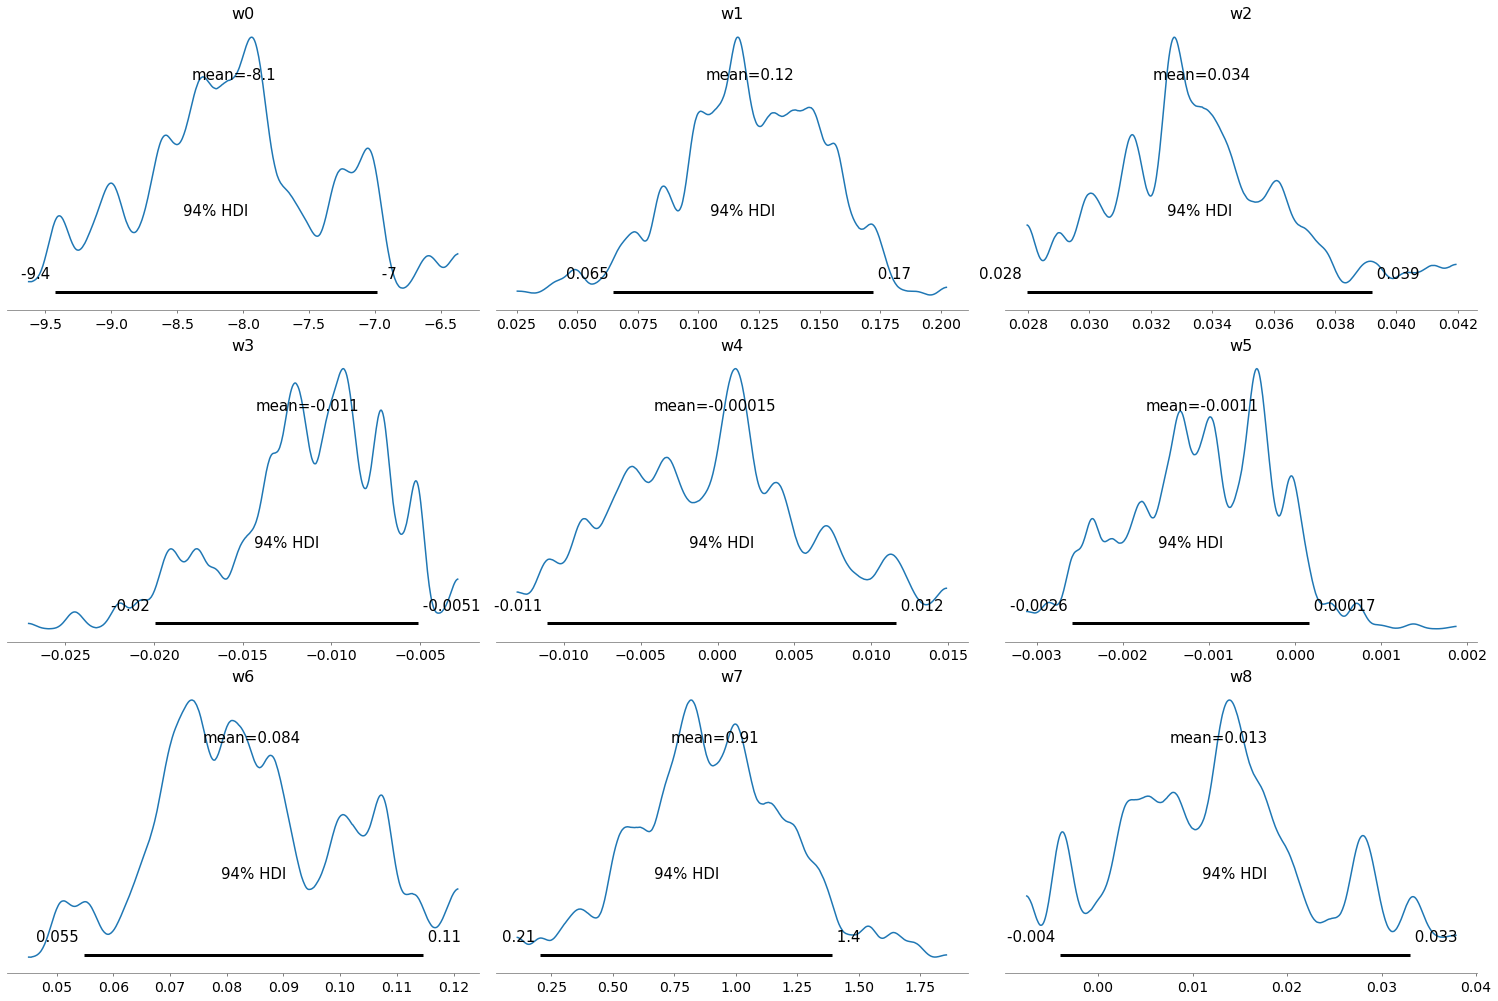

In [13]:
## 2 points

with logreg_model:
    ## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
    trace = pm.sample(400, step=pm.Metropolis())

    ## Explain the output of the plot 
    az.plot_posterior(trace)

The plot shows the posterior distribution of each parameter in the model, along with summary statistics such as the mean, median, standard deviation, and 94% credible intervals. This allows us to see the range of plausible values for each parameter, and to assess the uncertainty in our estimates. We see the mean fluctuating from -8.1 to 0.91.